In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
# Import dependancies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

# Machine learning on car collision data

In [4]:
# Load the data
file_path = Path('collision_data_ml_truck.csv')
ml_df = pd.read_csv(file_path)
ml_df

,collision_time,day_of_week,weather_1,type_of_collision,road_surface,road_cond_1,lighting,point_x,point_y,at_fault,...,vehicle_year,stwd_vehicle_type,race,victim_age,victim_sex,victim_role,safety_equip_used,victim_seating_postion,victim_ejected,severe_injury
0,20:09:00,7,A,A,A,H,C,-118.156710,34.660370,Y,...,2003,D,H,27,F,2,GL,3,0,0
1,16:04:00,3,A,D,A,H,C,-118.129960,34.605770,N,...,2007,D,W,70,M,1,HL,1,0,0
2,20:40:00,5,A,A,A,H,C,-118.550630,34.462246,Y,...,2007,D,W,23,F,2,GL,3,0,0
3,20:40:00,5,A,A,A,H,C,-118.550630,34.462246,Y,...,2007,D,W,24,M,1,GL,1,0,1
4,17:00:00,5,A,A,A,H,A,-118.513050,34.452870,N,...,2012,D,W,12,M,2,GL,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,09:00:00,2,A,D,A,D,A,-118.028992,33.881619,N,...,2013,D,H,53,M,1,GL,1,0,0
9431,09:25:00,2,A,C,A,H,A,-118.785042,34.146736,N,...,2005,D,W,37,F,2,GM,3,0,0
9432,12:25:00,2,A,B,A,H,A,-118.225143,33.929718,N,...,2013,D,H,42,M,1,GL,1,0,0
9433,05:38:00,7,A,A,A,H,B,-118.416008,33.916370,N,...,2002,D,H,50,M,1,GM,1,0,1


In [5]:
ml_df = ml_df.drop(columns=[ "point_x", "point_y", "stwd_vehicle_type", "oaf_1", 
                             "victim_sex", "at_fault", "race", "party_number_killed",
                            "party_number_injured", "victim_age", "vehicle_year", "collision_time",
                           "day_of_week"])
ml_df     

,weather_1,type_of_collision,road_surface,road_cond_1,lighting,party_soberiety,move_pre_acc,victim_role,safety_equip_used,victim_seating_postion,victim_ejected,severe_injury
0,A,A,A,H,C,B,E,2,GL,3,0,0
1,A,D,A,H,C,A,E,1,HL,1,0,0
2,A,A,A,H,C,B,B,2,GL,3,0,0
3,A,A,A,H,C,B,B,1,GL,1,0,1
4,A,A,A,H,A,D,B,2,GL,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9430,A,D,A,D,A,A,B,1,GL,1,0,0
9431,A,C,A,H,A,A,B,2,GM,3,0,0
9432,A,B,A,H,A,A,B,1,GL,1,0,0
9433,A,A,A,H,B,G,A,1,GM,1,0,1


In [6]:
list(ml_df.columns)

['weather_1',
 'type_of_collision',
 'road_surface',
 'road_cond_1',
 'lighting',
 'party_soberiety',
 'move_pre_acc',
 'victim_role',
 'safety_equip_used',
 'victim_seating_postion',
 'victim_ejected',
 'severe_injury']

In [7]:
ml_df.dtypes[ml_df.dtypes != 'int64'][ml_df.dtypes != 'float64']

weather_1            object
type_of_collision    object
road_surface         object
road_cond_1          object
lighting             object
party_soberiety      object
move_pre_acc         object
safety_equip_used    object
dtype: object

In [8]:
# Check weather data
ml_df["weather_1"].value_counts()

A    8192
B     962
C     262
E       9
F       6
G       4
Name: weather_1, dtype: int64

A - Clear
B - Cloudy
C - Raining
D - Snowing
E - Fog
F - Other
G - Wind

In [7]:
# Check collision factor
# ml_df["primary_coll_factor"].value_counts()

A - (Vehicle) Code Violation
B - Other Improper Driving

In [8]:
# Check type of collision
ml_df["type_of_collision"].value_counts()

C    1789
D    1173
B     446
A     277
E     165
G      34
H      20
F      19
Name: type_of_collision, dtype: int64

A - Head-On
B - Sideswipe
C - Rear End
D - Broadside
E - Hit Object
F - Overturned
G - Vehicle/Pedestrian
H - Other

In [9]:
# Check at fault data
# ml_df["at_fault"].value_counts()

In [13]:
# Check sobriety factor
ml_df["party_soberiety"].value_counts()

A    3633
B     136
G      53
C      53
H      42
D       6
Name: party_soberiety, dtype: int64

A - Had not been Drinking
B - Had been Drinking, Under Influence
C - Had been Drinking, Not Under Influence
D - Had been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

In [14]:
# Check oaf factor
# ml_df["oaf_1"].value_counts()

A - Violation
E - Vision Obscurements
F - Inattention (beginning 1/1/01; see Inattention Item Name near end of record for A-K, P values)
G - Stop and Go Traffic
H - Entering/Leaving Ramp
I - Previous Collision
J - Unfamiliar With Road
K - Defective Vehicle Equipment
L - Uninvolved Vehicle
M - Other
N - None Apparent
O - Runaway Vehicle
P - Inattention, Cell Phone (1/1/01)
Q - Inattention, Electronic Equip.(1/1/01)
R - Inattention, Radio/CD (1/1/01)
S - Inattention, Smoking (1/1/01)
T - Inattention, Eating (1/1/01)
U - Inattention, Children (1/1/01)
V - Inattention, Animal (1/1/01)
W - Inattention, Personal Hygiene (1/1/01)
X - Inattention, Reading (1/1/01)
Y - Inattention, Other (1/1/01)
- - Not Stated

In [15]:
# Check movement pre accident factor
move_pre_acc = ml_df["move_pre_acc"].value_counts()
move_pre_acc

B    1905
A     964
E     339
H     323
R      71
J      66
D      60
M      49
C      42
L      41
F      29
N      12
G      11
I       7
P       2
K       1
O       1
Name: move_pre_acc, dtype: int64

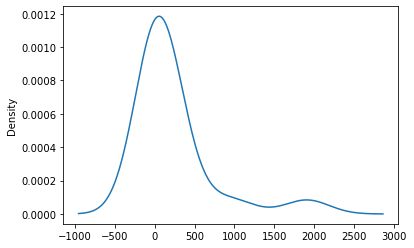

In [16]:
# Visualize the value counts of move_pre_acc
plot = move_pre_acc.plot.density()
fig = plot.get_figure()


A - Stopped
B - Proceeding Straight
C - Ran Off Road
D - Making Right Turn
E - Making Left Turn
F - Making U-Turn
G - Backing
H - Slowing/Stopping
I - Passing Other Vehicle
J - Changing Lanes
K - Parking Maneuver
L - Entering Traffic
M - Other Unsafe Turning
N - Crossed Into Opposing Lane
O - Parked
P - Merging
Q - Traveling Wrong Way
R - Other
- - Not Stated

In [17]:
# Check race feature
# ml_df["race"].value_counts()

In [18]:
# Check road type factor
ml_df["road_surface"].value_counts()

A    3705
B     214
C       4
Name: road_surface, dtype: int64

A - Dry
B - Wet
C - Snowy or Icy
D - Slippery (Muddy, Oily, etc.)

In [19]:
# Check road conditions factor
ml_df["road_cond_1"].value_counts()

H    3815
D      91
A       6
C       5
G       4
E       1
F       1
Name: road_cond_1, dtype: int64

	
A - Holes, Deep Ruts
B - Loose Material on Roadway
C - Obstruction on Roadway
D - Construction or Repair Zone
E - Reduced Roadway Width
F - Flooded
G - Other
H - No Unusual Condition

In [20]:
# Check lighting conditions factor
ml_df["lighting"].value_counts()

A    2808
C     795
D     181
B     134
E       5
Name: lighting, dtype: int64

	
A - Daylight
B - Dusk - Dawn
C - Dark - Street Lights
D - Dark - No Street Lights
E - Dark - Street Lights Not 

In [21]:
# Check safety equipment used conditions factor
pd.set_option('display.max_rows', 120)
ml_df["safety_equip_used"].value_counts()

GM    2401
GL    1139
GP     110
MQ      62
PQ      32
HL      28
HM      20
LQ      16
CM      13
BL      12
BM      11
BP       8
CL       7
MP       7
LM       7
EM       5
CP       5
BN       4
EL       4
HP       3
BG       3
PP       2
AM       2
LU       2
MN       2
GN       2
AL       2
PU       2
PW       2
AP       1
DM       1
LN       1
FM       1
HN       1
NY       1
MU       1
AG       1
FL       1
BB       1
Name: safety_equip_used, dtype: int64

A - None in Vehicle
B - Unknown
C - Lap Belt Used
D - Lap Belt Not Used
E - Shoulder Harness Used
F - Shoulder Harness Not Used
G - Lap/Shoulder Harness Used
H - Lap/Shoulder Harness Not Used
J - Passive Restraint Used
K - Passive Restraint Not Used
L - Air Bag Deployed
M - Air Bag Not Deployed
N - Other
P - Not Required
Q - Child Restraint in Vehicle Used
R - Child Restraint in Vehicle Not Used
S - Child Restraint in Vehicle, Use Unknown
T - Child Restraint in Vehicle, Improper Use
U - No Child Restraint in Vehicle
V - Driver, Motorcycle Helmet Not Used
W - Driver, Motorcycle Helmet Used
X - Passenger, Motorcycle Helmet Not Used
Y - Passenger, Motorcycle Helmet Used
- or blank - Not Stated AX  Z ˛z

In [22]:
# Check safety equipment used conditions factor
# ml_df["victim_sex"].value_counts()

# Machine Learning Modeling

In [23]:
# Convert strings to numeric values
from sklearn.preprocessing import LabelEncoder
ml_encoded = pd.get_dummies(ml_df, columns=["weather_1", "type_of_collision", "party_soberiety", 
                                            "move_pre_acc", "road_surface", "road_cond_1", 
                                            "lighting", "safety_equip_used"])
ml_encoded.head()


,victim_role,victim_seating_postion,victim_ejected,severe_injury,weather_1_A,weather_1_B,weather_1_C,weather_1_E,weather_1_F,weather_1_G,...,safety_equip_used_LU,safety_equip_used_MN,safety_equip_used_MP,safety_equip_used_MQ,safety_equip_used_MU,safety_equip_used_NY,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PU,safety_equip_used_PW
0,2,7,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Create our features
X = ml_encoded.drop("severe_injury", axis=1)
X.head()

# Create our target
y = ml_encoded["severe_injury"]

In [25]:
# Check the balance of our target values
y.value_counts()

0    3858
1      65
Name: severe_injury, dtype: int64

In [26]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Determine the shape of our training and testing sets.
print(f"Training Set X", X_train.shape)
print(f"Testing Set X", X_test.shape)
print(f"Training Set y", y_train.shape)
print(f"Testing Set y", y_test.shape)

Training Set X (2942, 94)
Testing Set X (981, 94)
Training Set y (2942,)
Testing Set y (981,)


# Random Oversampler

In [27]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 2890, 1: 2890})

In [28]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [29]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.8657375934738273
Testing Score: 0.8715596330275229


In [30]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8210823267641449

In [31]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,845,123
Actual Severe/Fatality,3,10


# SMOTE Imbalanced sampling 

In [32]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 2890, 1: 2890})

In [33]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [34]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.9738273283480625
Testing Score: 0.9683995922528033


In [35]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6045375079465989

In [36]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,947,21
Actual Severe/Fatality,10,3


In [37]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.98      0.23      0.98      0.48      0.24       968
          1       0.12      0.23      0.98      0.16      0.48      0.21        13

avg / total       0.98      0.97      0.24      0.97      0.48      0.24       981



# SMOTEENN Imbalanced sampling

In [38]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 2651, 1: 2829})

In [39]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [40]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6300858232676414

In [41]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])
cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,922,46
Actual Severe/Fatality,9,4


In [42]:
# Print the imbalanced classification report
print( classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.95      0.31      0.97      0.54      0.31       968
          1       0.08      0.31      0.95      0.13      0.54      0.27        13

avg / total       0.98      0.94      0.32      0.96      0.54      0.31       981



# Balanced Random Forest Classifier

In [43]:
# Imported sklearn and imblearn dependancies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import datasets

In [44]:
# Creating a StandardScaler instance and fit with the training data.
scaler = StandardScaler().fit(X_train)
# Scale the X data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2942, 94)
(981, 94)
(2942,)
(981,)


In [45]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators = 100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {brf_model.score(X_train_scaler, y_train)}')
print(f'Testing Score: {brf_model.score(X_test_scaler, y_test)}')

# Make Prediction
predictions = brf_model.predict(X_test_scaler)

Training Score: 0.7977566281441196
Testing Score: 0.7798165137614679


In [46]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7798165137614679

In [47]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])
cm_df


,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,755,213
Actual Severe/Fatality,3,10


In [48]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.78      0.77      0.87      0.77      0.60       968
          1       0.04      0.77      0.78      0.08      0.77      0.60        13

avg / total       0.98      0.78      0.77      0.86      0.77      0.60       981



In [49]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_


In [50]:
# Create dataframe with X data for ranked importance columns
ml_encoded_X = ml_encoded.drop("severe_injury", axis=1)
ml_encoded_X

,victim_role,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_E,weather_1_F,weather_1_G,type_of_collision_A,...,safety_equip_used_LU,safety_equip_used_MN,safety_equip_used_MP,safety_equip_used_MQ,safety_equip_used_MU,safety_equip_used_NY,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PU,safety_equip_used_PW
0,2,7,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,3,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3918,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3919,2,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3920,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3921,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances = sorted(zip(brf_model.feature_importances_, ml_encoded_X.columns), reverse=True)
ranked_importances

[(0.11078307751258812, 'safety_equip_used_GM'),
 (0.0669433736909058, 'victim_seating_postion'),
 (0.061652186572939034, 'lighting_A'),
 (0.05919707180847422, 'party_soberiety_A'),
 (0.052939720038533616, 'safety_equip_used_GL'),
 (0.05079922940528986, 'move_pre_acc_A'),
 (0.03744329798155293, 'type_of_collision_D'),
 (0.036133353479834936, 'victim_role'),
 (0.03576170333008775, 'type_of_collision_C'),
 (0.03567186614980109, 'move_pre_acc_B'),
 (0.035159088461375713, 'lighting_B'),
 (0.033961748409092975, 'lighting_D'),
 (0.030674538977284303, 'move_pre_acc_R'),
 (0.0274844386605002, 'lighting_C'),
 (0.024520069586499646, 'type_of_collision_A'),
 (0.021903185067021994, 'type_of_collision_B'),
 (0.02038126635133381, 'type_of_collision_E'),
 (0.01803777824580115, 'party_soberiety_B'),
 (0.0163995578000851, 'move_pre_acc_E'),
 (0.01597999302000773, 'move_pre_acc_H'),
 (0.015961913618045744, 'weather_1_B'),
 (0.014821152021461594, 'safety_equip_used_HL'),
 (0.014276201773098867, 'party_sob

In [52]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances_df = pd.DataFrame(sorted(ranked_importances, reverse=True), columns=["Importance", "Feature"])
ranked_importances_df

,Importance,Feature
0,0.110783,safety_equip_used_GM
1,0.066943,victim_seating_postion
2,0.061652,lighting_A
3,0.059197,party_soberiety_A
4,0.052940,safety_equip_used_GL
5,0.050799,move_pre_acc_A
6,0.037443,type_of_collision_D
7,0.036133,victim_role
8,0.035762,type_of_collision_C
9,0.035672,move_pre_acc_B


<Figure size 1440x720 with 0 Axes>

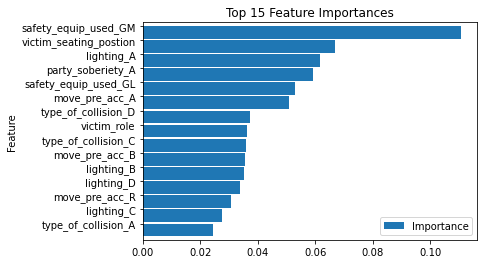

In [53]:
# Visualize top 10 feature importances
top_importances_df = ranked_importances_df.head(15)

plt.figure(figsize=(20,10))
top_importances_df.plot.barh(x="Feature", y="Importance", align='edge', width=0.9,
                      title="Top 15 Feature Importances",
                           ylabel="% Importance")
plt.gca().invert_yaxis()
plt.show
plt.savefig('topfeatureranking.png')


In [54]:
# Show count of total estimators in Balanced Random Forest Classifier
print(len(brf_model.estimators_))

100


# Easy Ensemble Classifier

In [55]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {eec.score(X_train_scaler, y_train)}')
print(f'Testing Score: {eec.score(X_test_scaler, y_test)}')


predictions = eec.predict(X_test_scaler)

Training Score: 0.752549286199864
Testing Score: 0.7339449541284404


In [56]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7339449541284404

In [57]:
# Display the confusion matrix
y_pred = eec.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)

In [58]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual High Risk", "Actual Low Risk"], columns=["Predicted High Risk", "Predicted Low Risk"])

cm_df


,Predicted High Risk,Predicted Low Risk
Actual High Risk,710,258
Actual Low Risk,3,10


In [59]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.73      0.77      0.84      0.75      0.56       968
          1       0.04      0.77      0.73      0.07      0.75      0.57        13

avg / total       0.98      0.73      0.77      0.83      0.75      0.56       981

